kgmyh@naver.com 으로 `이름_주유소가격 데이터 분석.html` 로 제출
- html 파일로 변환
    - File > Download as > HTML (.html) 선택

# 데이터 불러오기

- 2022년 주유소들의 일자별 가격 데이터
- https://www.opinet.co.kr/user/opdown/opDownload.do

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# 상반기, 하반기 주유소 가격 데이터 조회
d1 = pd.read_csv('data/2022년_서울_상반기_일별_가격.csv', encoding='cp949')
d2 = pd.read_csv('data/2022년_서울_하반기_일별_가격.csv', encoding='cp949')
d1.shape, d2.shape

((82689, 11), (81793, 11))

In [9]:
# 상반기, 하반기 DataFrame 합치기
df = pd.concat([d1, d2], ignore_index=True)
df.shape

(164482, 11)

In [11]:
# DataFrame 기본 정보 조회
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 11 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   번호      164482 non-null  object
 1   지역      164482 non-null  object
 2   상호      164482 non-null  object
 3   주소      164482 non-null  object
 4   기간      164482 non-null  int64 
 5   상표      164482 non-null  object
 6   셀프여부    164482 non-null  object
 7   고급휘발유   164482 non-null  int64 
 8   휘발유     164482 non-null  int64 
 9   경유      164482 non-null  int64 
 10  실내등유    164482 non-null  int64 
dtypes: int64(5), object(6)
memory usage: 13.8+ MB


In [12]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0


In [14]:
df.tail(10)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유
164472,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221222,GS칼텍스,셀프,0,1525,1745,0
164473,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221223,GS칼텍스,셀프,0,1525,1745,0
164474,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221224,GS칼텍스,셀프,0,1525,1745,0
164475,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221225,GS칼텍스,셀프,0,1525,1745,0
164476,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221226,GS칼텍스,셀프,0,1525,1745,0
164477,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221227,GS칼텍스,셀프,0,1525,1745,0
164478,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221228,GS칼텍스,셀프,0,1525,1720,0
164479,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221229,GS칼텍스,셀프,0,1525,1720,0
164480,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221230,GS칼텍스,셀프,0,1515,1715,0
164481,A0009138,서울 중랑구,우림주유소,서울 중랑구 용마산로 487 (망우제3동),20221231,GS칼텍스,셀프,0,1515,1715,0


In [15]:
df.isnull().sum()

번호       0
지역       0
상호       0
주소       0
기간       0
상표       0
셀프여부     0
고급휘발유    0
휘발유      0
경유       0
실내등유     0
dtype: int64

In [16]:
df.describe()  #  정수/실수 타입 컬럼

,기간,고급휘발유,휘발유,경유,실내등유
count,1.644820e+05,164482.000000,164482.000000,164482.000000,164482.000000
mean,2.022066e+07,1083.639146,1877.600838,1907.360337,538.948444
std,3.456995e+02,1085.018886,243.317021,237.067045,761.401689
min,2.022010e+07,0.000000,0.000000,0.000000,0.000000
25%,2.022033e+07,0.000000,1690.000000,1817.000000,0.000000
50%,2.022063e+07,1760.000000,1855.000000,1899.000000,0.000000
75%,2.022093e+07,2130.000000,2030.000000,2018.000000,1451.000000
max,2.022123e+07,3496.000000,3096.000000,3230.000000,2719.000000


In [17]:
df.describe(include='object') # 문자열(object) 

,번호,지역,상호,주소,상표,셀프여부
count,164482,164482,164482,164482,164482,164482
unique,469,25,464,469,7,2
top,A0006039,서울 강남구,대성주유소,서울 강남구 논현로 640,SK에너지,셀프
freq,365,12278,730,365,48267,92478


In [21]:
# 상표 컬럼의 고유값 조회
df['상표'].unique()
df['상표'].value_counts()
df['상표'].value_counts(normalize=True)

SK에너지     0.293449
현대오일뱅크    0.257481
GS칼텍스     0.245917
S-OIL     0.174864
알뜰주유소     0.021589
자가상표      0.004481
알뜰(ex)    0.002219
Name: 상표, dtype: float64

In [26]:
# 지역 컬럼의 고유값 조회
df['지역'].unique()
df['지역'].value_counts()
df['지역'].value_counts(normalize=True)

서울 강남구     0.074646
서울 강서구     0.071892
서울 송파구     0.068670
서울 서초구     0.068281
서울 영등포구    0.059666
서울 양천구     0.054808
서울 성북구     0.051811
서울 구로구     0.044892
서울 동대문구    0.039968
서울 성동구     0.036515
서울 도봉구     0.036430
서울 은평구     0.035305
서울 노원구     0.033280
서울 서대문구    0.033268
서울 강동구     0.031067
서울 광진구     0.031049
서울 관악구     0.031031
서울 중랑구     0.029626
서울 용산구     0.028192
서울 강북구     0.027115
서울 마포구     0.026599
서울 금천구     0.024726
서울 중구      0.022148
서울 동작구     0.020890
서울 종로구     0.018124
Name: 지역, dtype: float64

In [27]:
df['셀프여부'].value_counts()

셀프    92478
일반    72004
Name: 셀프여부, dtype: int64

> ### str accessor
> - `Series.str.String메소드()`
> - 문자열 타입 Series에 String 메소드들을 사용하여 일괄처리 할 수 있도록 한다.
> - str accessor 메소드 : https://pandas.pydata.org/pandas-docs/stable/reference/series.html#api-series-str

> ### datetime으로 변환
> - `pd.to_datetime(변환할 Series, format="날짜형식")`
> - x 또는 y 축이 날짜 일 경우 datetime 타입으로 처리하는 것이 좋다.
> - format: 년월일의 형식을 strftime 형식문자열로 지정한다. 
>      - [strftime 형식](https://docs.python.org/3/library/datetime.html#strftime-and-strptime-format-codes)  
> - datetime을 변환하면 날짜만의 기능을 다룰 수 있다.
>     - dt accessor를 이용해 datetime의 속성값들을(년, 월, 일 등) 추출할 수 있다.
>     - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.dt.html


In [33]:
'서울 강남구'.split()[1]
# '서울 강남구'.slice(3) => str accessor 이용
'서울 강남구'[3:]

'강남구'

In [39]:
# 지역 컬럼의 값을 이용하여 "구" 컬럼 생성 (지역에서 구만 추출해서 파생변수컬럼 생성)
df['구'] = df['지역'].apply(lambda x : x.split()[1])
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220101,SK에너지,셀프,1887,1737,1587,0,강남구
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220102,SK에너지,셀프,1887,1737,1587,0,강남구
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220103,SK에너지,셀프,1887,1737,1587,0,강남구
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220104,SK에너지,셀프,1887,1737,1587,0,강남구
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,20220105,SK에너지,셀프,1887,1737,1587,0,강남구


In [38]:
df['지역'].str.slice(3)

0         강남구
1         강남구
2         강남구
3         강남구
4         강남구
         ... 
164477    중랑구
164478    중랑구
164479    중랑구
164480    중랑구
164481    중랑구
Name: 지역, Length: 164482, dtype: object

In [43]:
# 기간 컬럼을 datetime 타입으로 변경
df['기간'] = pd.to_datetime(df['기간'], format="%Y%m%d")  #Y:년, m:월(2자리), d:일,  H: 시간, M:분, S: 초

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164482 entries, 0 to 164481
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype         
---  ------  --------------   -----         
 0   번호      164482 non-null  object        
 1   지역      164482 non-null  object        
 2   상호      164482 non-null  object        
 3   주소      164482 non-null  object        
 4   기간      164482 non-null  datetime64[ns]
 5   상표      164482 non-null  object        
 6   셀프여부    164482 non-null  object        
 7   고급휘발유   164482 non-null  int64         
 8   휘발유     164482 non-null  int64         
 9   경유      164482 non-null  int64         
 10  실내등유    164482 non-null  int64         
 11  구       164482 non-null  object        
dtypes: datetime64[ns](1), int64(4), object(7)
memory usage: 15.1+ MB


In [49]:
# 기간 컬럼을 이용해 "월", "일", "요일" 컬럼 생성 (dt accessor 이용)
df['월'] = df['기간'].dt.month
df['일'] = df['기간'].dt.day
df['요일'] = df['기간'].dt.weekday

In [50]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,5
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,6
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,0
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,1
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,2


In [52]:
def cw(num_x):
    if num_x == 0:
        return "월"
    elif num_x == 1:
        return "화"
    ...
cw(1)    

'화'

In [56]:
"월화수목금토일"[6]

'일'

In [61]:
# 요일 - 0:월, 1:화, 2:수, 3:목, 4:금, 5:토, 6:일 로 변경
df['요일'] = df['요일'].apply(lambda x : "월화수목금토일"[x])# +"요일")

In [62]:
df.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [63]:
# 전처리를 완료 -> 파일로 저장
df.to_csv('data/2022년_주유소_가격_데이터_preprocessing.csv', index=False)

In [64]:
df2 = pd.read_csv('data/2022년_주유소_가격_데이터_preprocessing.csv')
df2.head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
0,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-01,SK에너지,셀프,1887,1737,1587,0,강남구,1,1,토
1,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-02,SK에너지,셀프,1887,1737,1587,0,강남구,1,2,일
2,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-03,SK에너지,셀프,1887,1737,1587,0,강남구,1,3,월
3,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-04,SK에너지,셀프,1887,1737,1587,0,강남구,1,4,화
4,A0006039,서울 강남구,(유)동하석유 힐탑셀프주유소,서울 강남구 논현로 640,2022-01-05,SK에너지,셀프,1887,1737,1587,0,강남구,1,5,수


In [67]:
# 휘발유 가격이 가장 비싼 5개 행 조회
# df.sort_values('휘발유', ascending=False).head()
df.sort_values(['휘발유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일


In [74]:
# 휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
# df[df['휘발유']!=0].sort_values(['휘발유', '기간']).head(5)
df.query('휘발유 != 0').sort_values(['휘발유', '기간']).head(5)

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
97838,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-23,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,23,금
99494,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-23,알뜰주유소,셀프,0,1410,1660,0,강서구,12,23,금
97839,A0000549,서울 강서구,이케이에너지(주) 강서주유소,서울 강서구 화곡로 273 (화곡동),2022-12-24,현대오일뱅크,셀프,0,1410,1660,0,강서구,12,24,토
99495,A0000519,서울 강서구,화곡역주유소,서울 강서구 강서로 154 (화곡동),2022-12-24,알뜰주유소,셀프,0,1410,1660,0,강서구,12,24,토
148431,A0001005,서울 양천구,현대주유소,서울 양천구 남부순환로 372 (신월동),2022-12-24,S-OIL,셀프,0,1410,1660,0,양천구,12,24,토


In [75]:
# 고급휘발유 가격이 가장 비싼 5개 행 조회
df.sort_values(['고급휘발유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78935,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-22,SK에너지,일반,3496,3096,3223,2719,중구,6,22,수
78936,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-23,SK에너지,일반,3496,3096,3223,2719,중구,6,23,목
78937,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-24,SK에너지,일반,3496,3096,3223,2719,중구,6,24,금
78938,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-25,SK에너지,일반,3496,3096,3223,2719,중구,6,25,토
78939,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-26,SK에너지,일반,3496,3096,3223,2719,중구,6,26,일


In [79]:
# 고급휘발유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('고급휘발유 != 0').sort_values(['고급휘발유', '기간']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
98570,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-19,S-OIL,셀프,1599,1527,1787,0,강서구,12,19,월
98571,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-20,S-OIL,셀프,1599,1527,1787,0,강서구,12,20,화
98572,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-21,S-OIL,셀프,1599,1499,1759,0,강서구,12,21,수
98573,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-22,S-OIL,셀프,1599,1499,1759,0,강서구,12,22,목
98574,A0000520,서울 강서구,하이웨이주유소,서울특별시 강서구 공항대로 432(화곡동),2022-12-23,S-OIL,셀프,1599,1499,1729,0,강서구,12,23,금


In [80]:
# 경유 가격이 가장 비싼 5개 행 조회
df.sort_values(['경유', '기간'], ascending=[False, True]).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
78941,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-28,SK에너지,일반,3481,3081,3230,2703,중구,6,28,화
78942,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-29,SK에너지,일반,3481,3081,3230,2703,중구,6,29,수
78943,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-06-30,SK에너지,일반,3481,3081,3230,2703,중구,6,30,목
160618,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-01,SK에너지,일반,3481,3081,3230,2703,중구,7,1,금
160619,A0000767,서울 중구,서남주유소,서울 중구 통일로 30,2022-07-02,SK에너지,일반,3481,3081,3230,2703,중구,7,2,토


In [81]:
# 경유 가격이 가장 저렴한 5개 행 조회 (단 0원인 주유소 제외)
df.query('경유 != 0').sort_values(['경유', '기간']).head()

,번호,지역,상호,주소,기간,상표,셀프여부,고급휘발유,휘발유,경유,실내등유,구,월,일,요일
45209,A0011826,서울 서초구,만남의광장주유소,서울 서초구 양재대로12길 73-71,2022-01-16,알뜰(ex),셀프,0,1565,1367,0,서초구,1,16,일
23999,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-01,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,1,토
24000,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-02,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,2,일
24001,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-03,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,3,월
24002,A0000855,서울 구로구,대원셀프주유소,서울 구로구 개봉로 7,2022-01-04,현대오일뱅크,셀프,0,1577,1377,0,구로구,1,4,화


In [84]:
# 상표별 휘발유 평균가격 조회
상표별_휘발유_평균가격 = df.groupby('상표')['휘발유'].mean().sort_values()
상표별_휘발유_평균가격 

상표
알뜰(ex)    1759.884932
알뜰주유소     1767.914672
자가상표      1823.622795
현대오일뱅크    1839.447215
S-OIL     1859.282595
GS칼텍스     1904.899429
SK에너지     1908.900823
Name: 휘발유, dtype: float64

In [89]:
# 0원인 주유소는 빼고 계산
df.query('휘발유!=0').groupby('상표')['휘발유'].mean().sort_values()

상표
알뜰(ex)    1759.884932
알뜰주유소     1769.908373
자가상표      1838.590971
현대오일뱅크    1846.510441
S-OIL     1859.541206
GS칼텍스     1908.343496
SK에너지     1910.959577
Name: 휘발유, dtype: float64

In [98]:
range(상표별_휘발유_평균가격.size)

7

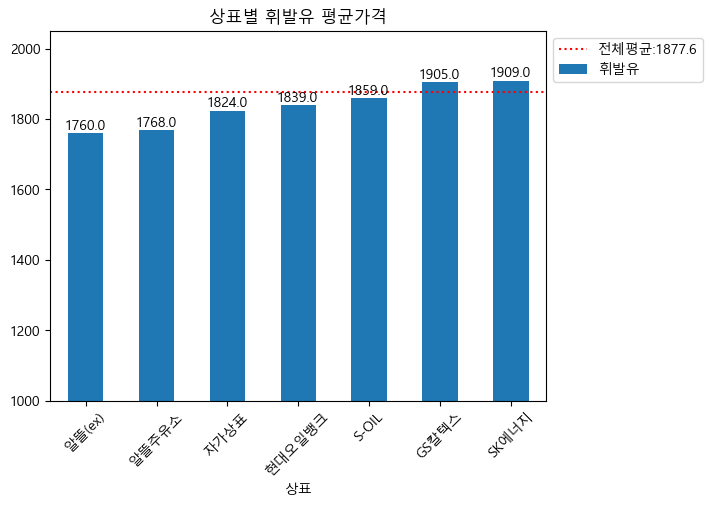

In [109]:
# 상표별 휘발유 평균가격 시각화
휘발유_전체_평균 = np.round(df['휘발유'].mean(), 2)

상표별_휘발유_평균가격.plot(kind='bar', rot=45)
plt.axhline(휘발유_전체_평균, color='red', linestyle=':', label=f'전체평균:{휘발유_전체_평균}')

for i in range(상표별_휘발유_평균가격.size):
    txt = str(np.round(상표별_휘발유_평균가격[i]))
    plt.text(i-0.3, 상표별_휘발유_평균가격[i]+10, txt)

plt.title('상표별 휘발유 평균가격')
plt.ylim(1000, 2050)
plt.legend(bbox_to_anchor=(1,1), loc='upper left')
plt.show()

In [ ]:
# 셀프주유소와 일반주유소 개수 확인


In [ ]:
# 셀프 여부에 따른 휘발유 평균 가격 비교 


In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교


In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격 평균 비교 시각화


In [ ]:
# 상표별 휘발유 가격의 분포를 boxplot으로 시각화


In [ ]:
# 상표별 일반/셀프 주유소의 휘발유 가격에 대한 분포 확인 - boxplot으로 시각화


In [ ]:
# 구별 휘발유 가격의 평균


In [ ]:
# 평균 가격이 가장 높은 구의 상표별 휘발유 평균가격


In [ ]:
# 월 평균 휘발유 가격


In [ ]:
# 각 구의 월별 평균 휘발유 가격 


In [ ]:
# 각 구의 월별 평균가격의 변화추이 시각화


In [ ]:
# 가장 휘발유가격이 비싼 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)


In [ ]:
# 가장 휘발유가격이 저렴한 주유소 상위 5 - (같은 주유소가 여러개 나오므로 가장 비싼 가격을 기준으로 집계)


In [ ]:
# 휘발유 비싼 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거-drop_duplicates)


In [ ]:
# 휘발유 저렴한 주유소의 상위 5개의 상호, 지역, 주소 조회(중복제거)


In [ ]:
# 고급 휘발유를 가장 많이 파는 구 조회


In [ ]:
###############################################################################
# 주유소 가격 데이터를 이용해서 알고 싶은 정보들을 추가 분석해 보세요.
###############################################################################
